# Introduction
This dataset provides birth rates and related data across the 50 states and DC from 2016 to 2021. The data was sourced from the Centers for Disease Control and Prevention (CDC) and includes detailed information such as number of births, gender, birth weight, state, and year of the delivery. A particular emphasis is given to detailed information on the mother's educational level. With this dataset, one can, for example, examine trends and patterns in birth rates across different academic groups and geographic locations.


## Import

In [299]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

## Explotary Data Analysis

In [300]:
df = pd.read_csv(r"./us_births_2016_2021.csv");
df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [301]:
df.shape

(5496, 9)

In [302]:
df.columns

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)'],
      dtype='object')

- Dataset has **5496** records and **9** columns.
- Columns
    - State: state name in full (includes District of Columbia)
    - State Abbreviation: 2-character state abbreviation
    - Year: 4-digit year
    - Gender: Gender of baby
    - Education Level of Mother: See table below
    - Education Level Code: See table below
    - Number of Births: Number of births for the category
    - Average Age of Mother (years): Mother's average age in the category
    - Average Birth Weight (g): Average birth weight in the category

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5496 entries, 0 to 5495
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          5496 non-null   object 
 1   State Abbreviation             5496 non-null   object 
 2   Year                           5496 non-null   int64  
 3   Gender                         5496 non-null   object 
 4   Education Level of Mother      5496 non-null   object 
 5   Education Level Code           5496 non-null   int64  
 6   Number of Births               5496 non-null   int64  
 7   Average Age of Mother (years)  5496 non-null   float64
 8   Average Birth Weight (g)       5496 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 386.6+ KB


- Dataset has no null value.
- Datseset has no type mismatch.

In [304]:
df.nunique()

State                              51
State Abbreviation                 51
Year                                6
Gender                              2
Education Level of Mother           9
Education Level Code                9
Number of Births                 3658
Average Age of Mother (years)     125
Average Birth Weight (g)         3087
dtype: int64

- **Categorical Data**
    - [State, State Abbreviation, Year, Gender, Education Level of Mother, Education Level Code]
- **Numerical Data**
    - [Number of Births, Average Age of Mother (years), Average Birth Weight (g)]

In [305]:
df.duplicated().sum() 

0

- No duplicated rows is existed.

In [306]:
df.rename(columns={'State Abbreviation':'state_abbr',\
                   'Education Level of Mother':'Education_level',\
                   'Education Level Code':'Education_code',\
                   'Number of Births':'Num_of_births',\
                   'Average Age of Mother (years)':'avg_age',
                   'Average Birth Weight (g)':'avg_weight'},inplace = True)

In [307]:
def FeaturesContainSimilarInfo(dataSet, f1, f2):
    for value in dataSet[f2].unique():
        s = set(dataSet[dataSet[f2] == value][f1]);
        if len(s) != 1:
            return False;
    return True;

In [309]:
FeaturesContainSimilarInfo(df, "State", "state_abbr")

True

In [310]:
FeaturesContainSimilarInfo(df, "Education_level", "Education_code")

True

- **State** and **State Abbreviation** contains similar information.
- **Education Level of Mother** and **Education Level Code** contains similar information.

In [311]:
pd.DataFrame(df.groupby(["Education_code"])["Education_level"].unique())

,Education_level
Education_code,
-9,[Unknown or Not Stated]
1,[8th grade or less]
2,[9th through 12th grade with no diploma]
3,[High school graduate or GED completed]
4,"[Some college credit, but not a degree]"
5,"[Associate degree (AA, AS)]"
6,"[Bachelor's degree (BA, AB, BS)]"
7,"[Master's degree (MA, MS, MEng, MEd, MSW, MBA)]"
8,"[Doctorate (PhD, EdD) or Professional Degree (..."


In [312]:
df['Education_level'] = df['Education_level'].replace({'8th grade or less':'middle school',\
                                                       '9th through 12th grade with no diploma':'high school drop out',\
                                                       'Associate degree (AA, AS)':'associates',\
                                                       'Bachelor\'s degree (BA, AB, BS)':'Bachelor\'s',\
                                                       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)':'Phd',\
                                                       'High school graduate or GED completed':'high school',\
                                                       'Master\'s degree (MA, MS, MEng, MEd, MSW, MBA)':'Master\s',\
                                                       'Some college credit, but not a degree':'Some college'})

In [314]:
pd.DataFrame(df.groupby(["State"])["state_abbr"].unique())

,state_abbr
State,
Alabama,[AL]
Alaska,[AK]
Arizona,[AZ]
Arkansas,[AR]
California,[CA]
Colorado,[CO]
Connecticut,[CT]
Delaware,[DE]
District of Columbia,[DC]


- Since [**State** and **State Abbreviation**] and [**Education Level of Mother** and **Education Level Code**]contains similar information. So we can drop one of feature.
- Droping **State Abbreviation** and **Education Level Code**.

In [315]:
#df.drop(["State Abbreviation", "Education Level Code"], axis=1, inplace=True)

In [316]:
df.head()

,State,state_abbr,Year,Gender,Education_level,Education_code,Num_of_births,avg_age,avg_weight
0,Alabama,AL,2016,F,middle school,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,high school drop out,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,high school,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,Some college,4,6453,26.7,3121.9
4,Alabama,AL,2016,F,associates,5,2227,28.9,3174.3


- 7 unique feature is left

### Birth Gender Ratio

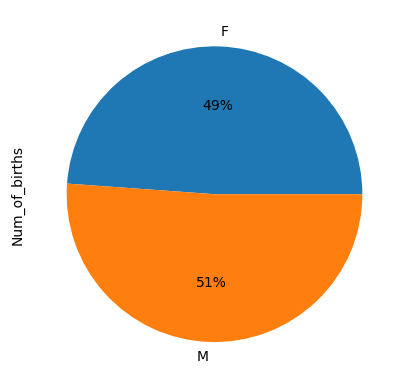

In [318]:
df.groupby("Gender")["Num_of_births"].sum().plot(kind="pie", autopct="%.0f%%")
plt.show()

- Overall birth gender ratio of Male to Female is 51:49. 

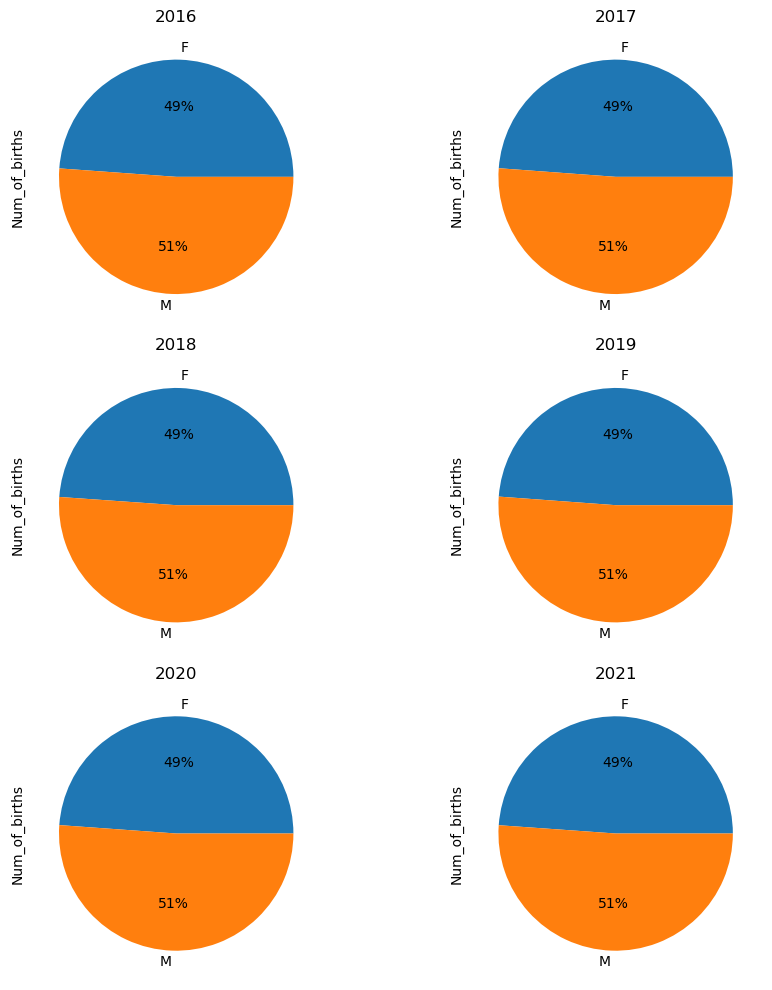

In [337]:
df_group_by_year_gender = df.groupby(["Year","Gender"])["Num_of_births"].sum()
plt.figure(figsize=(10,10));
index = 1;
for year in df.Year.unique():
    axes=plt.subplot(3, 2, index);
    df_group_by_year_gender[year].plot(kind="pie", ax=axes, title=year, autopct="%.0f%%");
    index += 1;
plt.tight_layout();
plt.show();

- From 2016 to 2021 birth gender ratio of Male to Female is 51:49 in US.

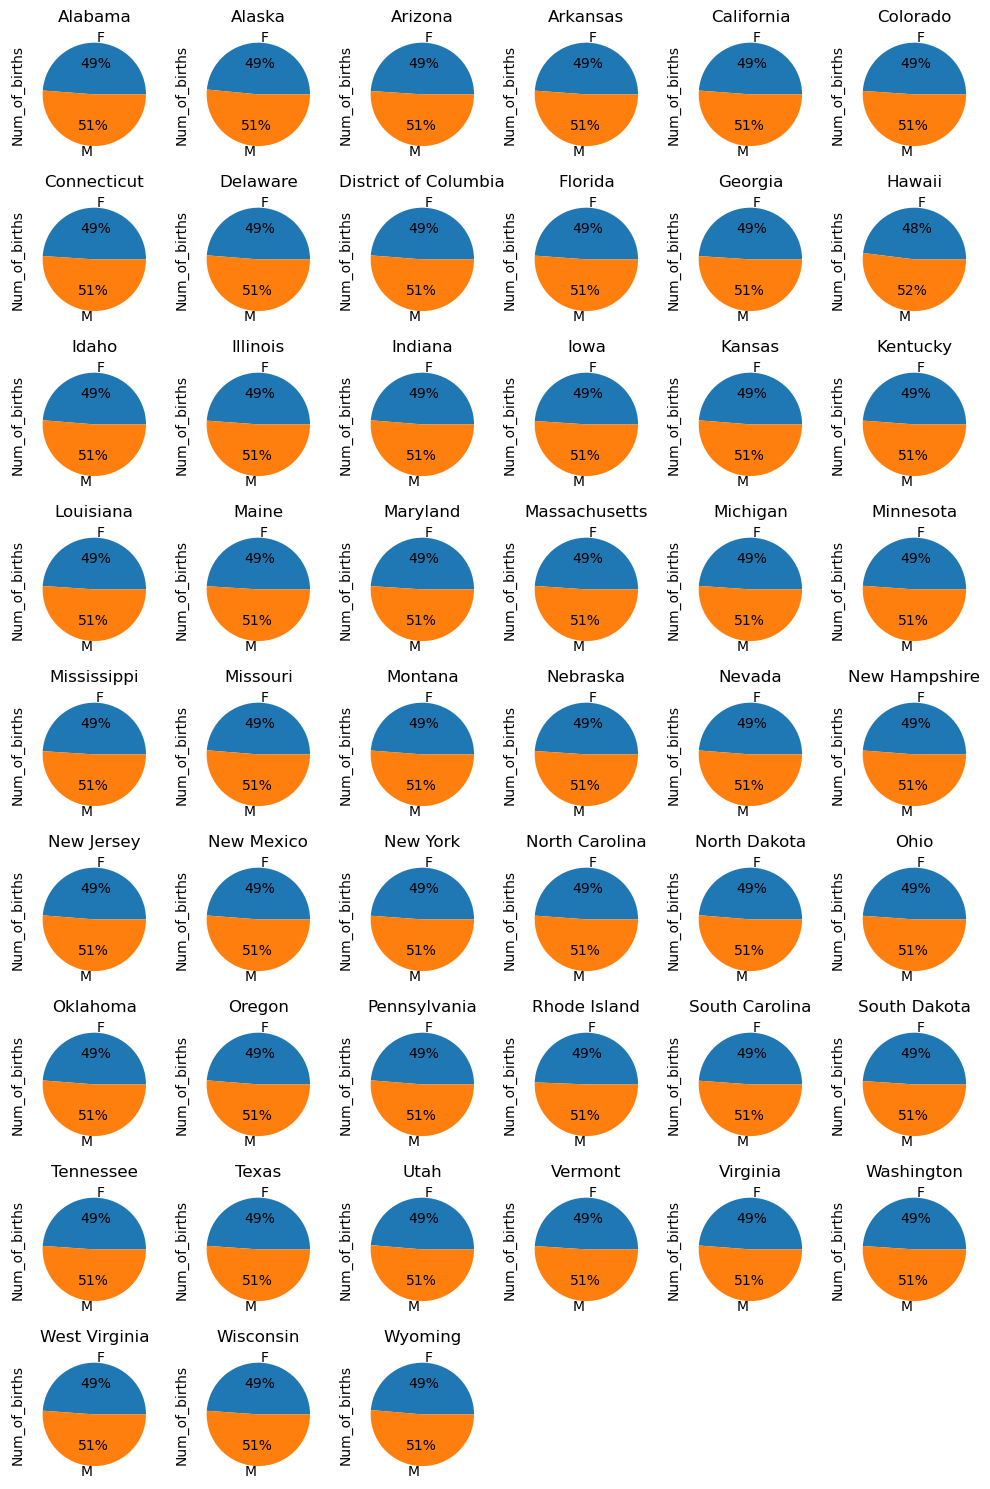

In [320]:
df_group_by_state_gender = df.groupby(["State", "Gender"])["Num_of_births"].sum()
plt.figure(figsize=(10,15));
index = 1;
for state in df.State.unique():
    axes=plt.subplot(9, 6, index);
    df_group_by_state_gender[state].plot(kind="pie", ax=axes, title=state, autopct="%.0f%%");
    index += 1;
plt.tight_layout();
plt.show();

- Birth gender ratio of Male to Female on each state is 51:49 in US.

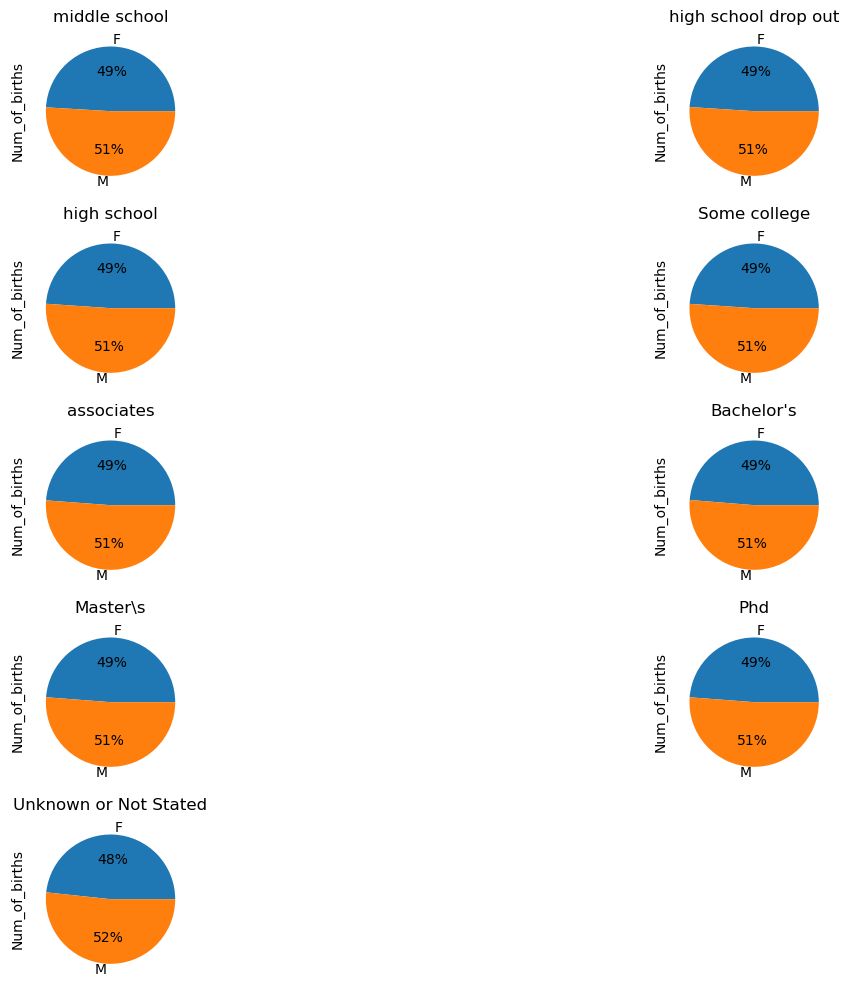

In [321]:
df_groupby_education_gender = df.groupby(["Education_level", "Gender"])["Num_of_births"].sum()
plt.figure(figsize=(15,10));
index = 1;
for education in df["Education_level"].unique():
    axes=plt.subplot(5, 2, index);
    df_groupby_education_gender[education].plot(kind="pie", ax=axes, title=education, autopct="%.0f%%");
    index += 1;
plt.tight_layout();
plt.show();

- Birth gender ratio of Male to Female is 49:51 among different education level of Mother.

### Population Growth

In [322]:
df["Num_of_births"].sum()

22618480

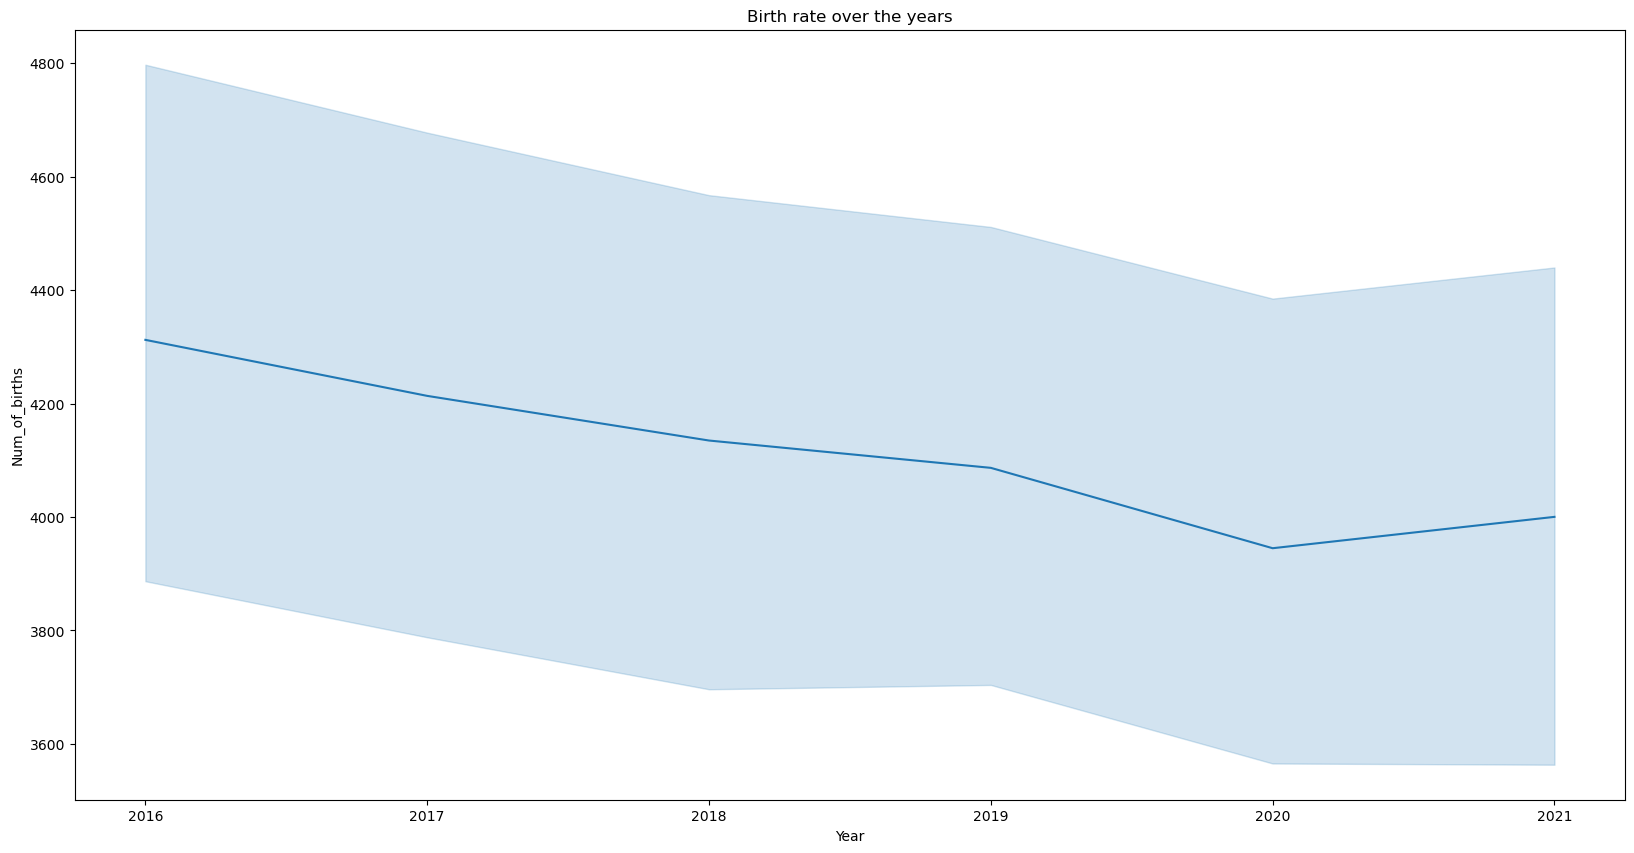

In [324]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Year',y='Num_of_births',data =df);
plt.title('Birth rate over the years');

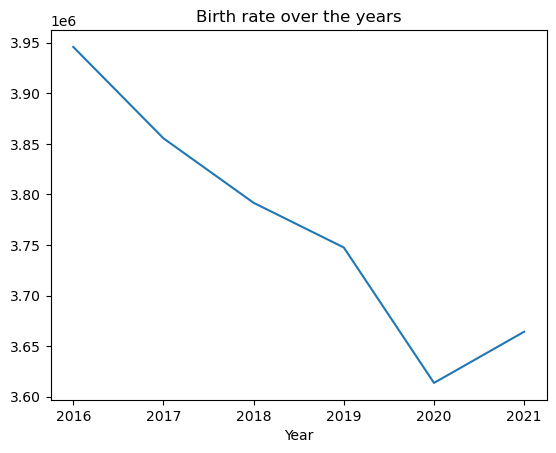

In [325]:
df.groupby(["Year"])["Num_of_births"].sum().plot(kind='line');
plt.title('Birth rate over the years');
plt.show()

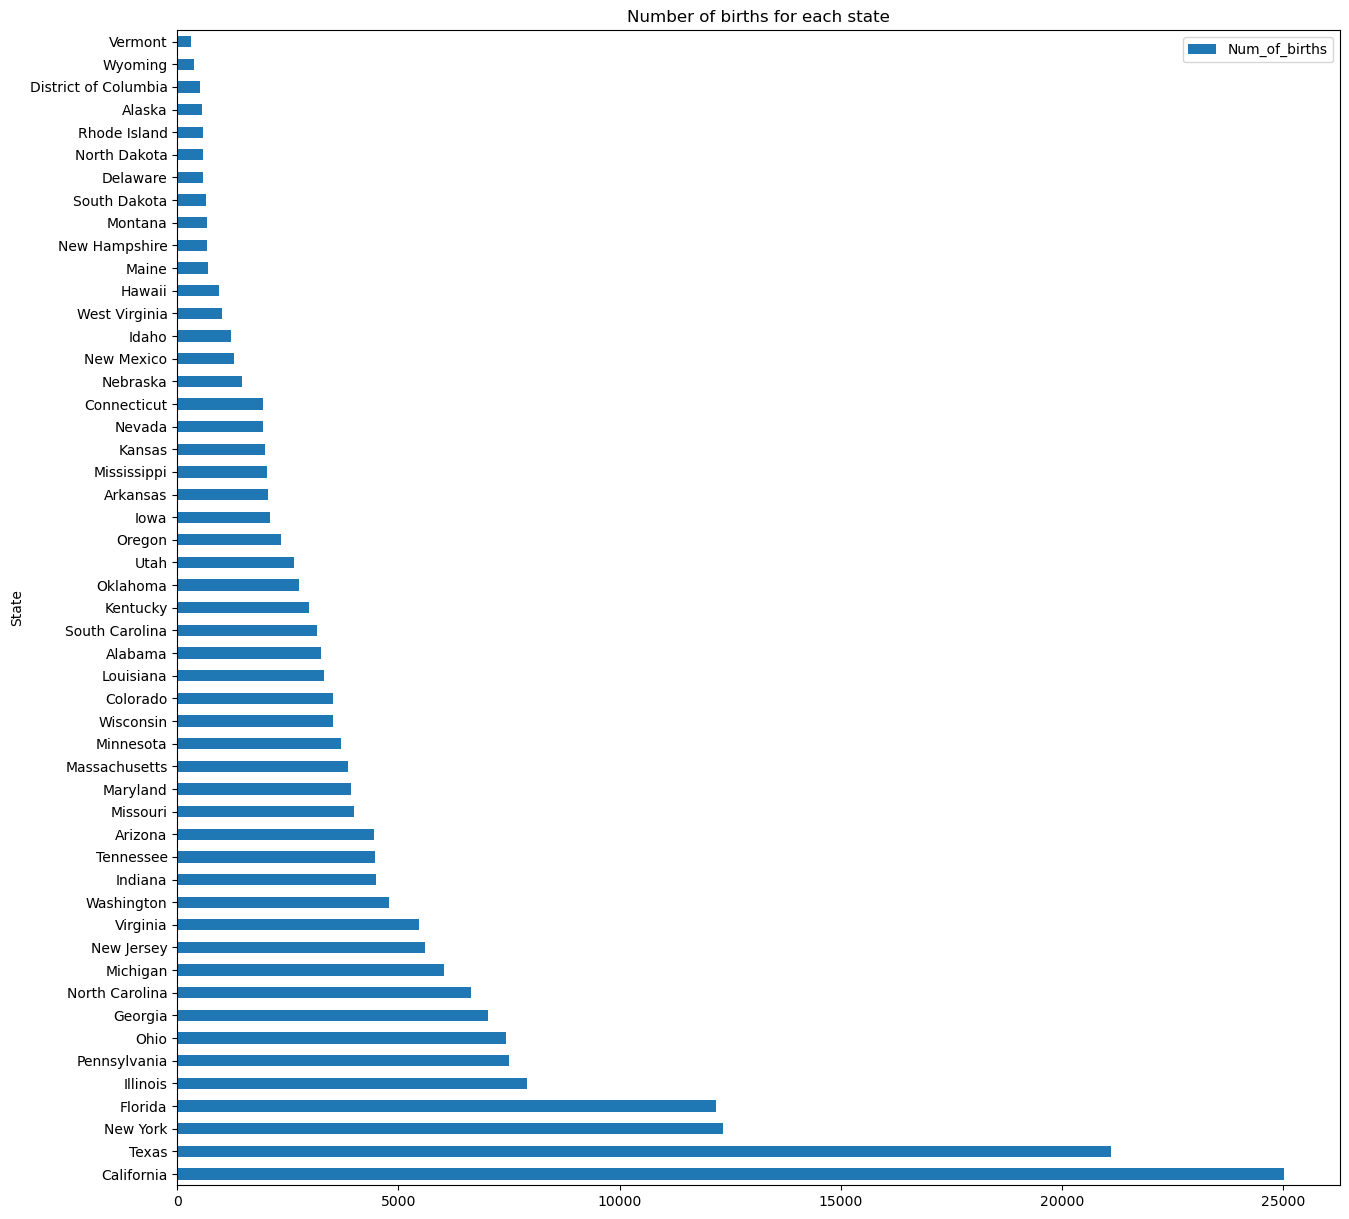

In [326]:
df.groupby('State').agg({'Num_of_births':'mean'}).sort_values(by='Num_of_births',ascending = False).round(0)\
    .plot(kind = 'barh',figsize=(15,15),title = 'Number of births for each state');

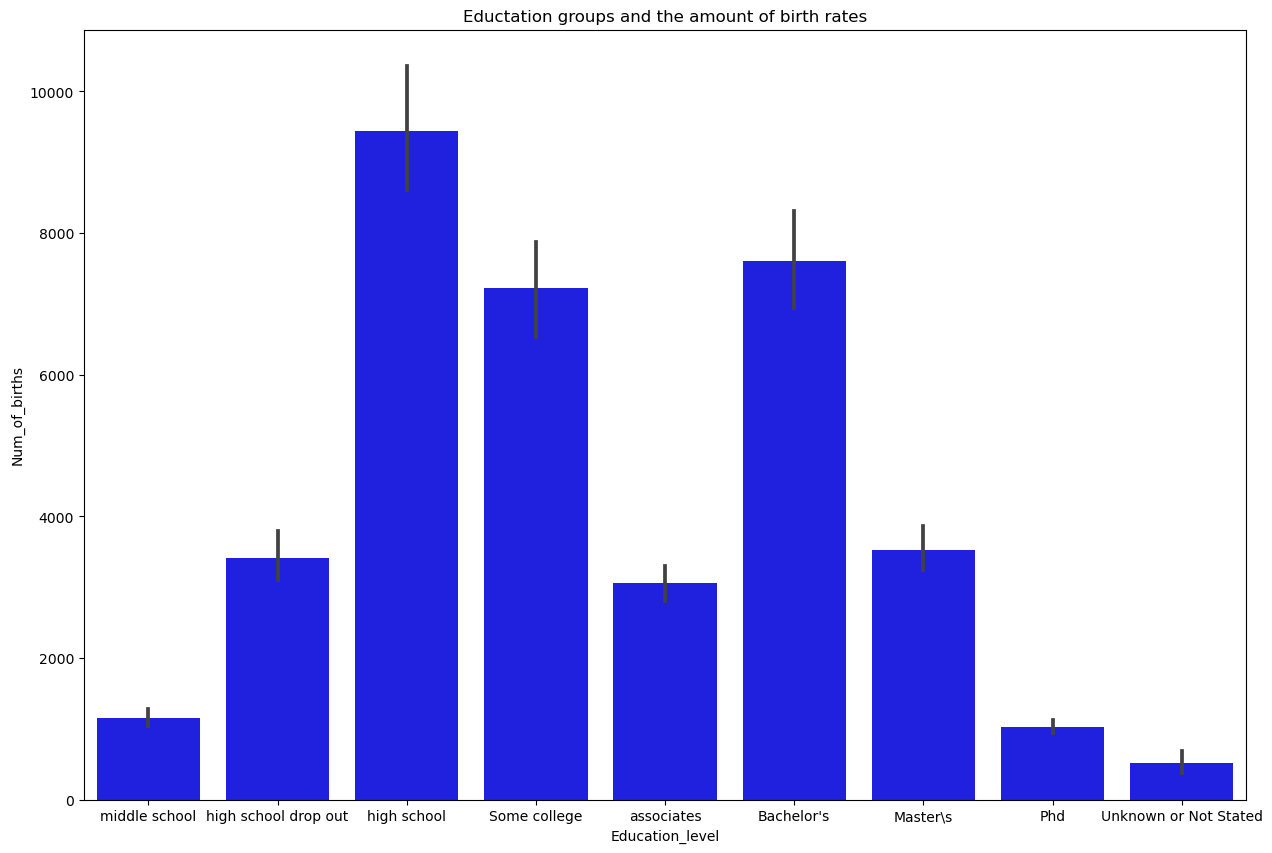

In [327]:
plt.figure(figsize=(15,10))
sns.barplot(x='Education_level',y='Num_of_births',data = df,color = 'blue');
plt.title('Eductation groups and the amount of birth rates');

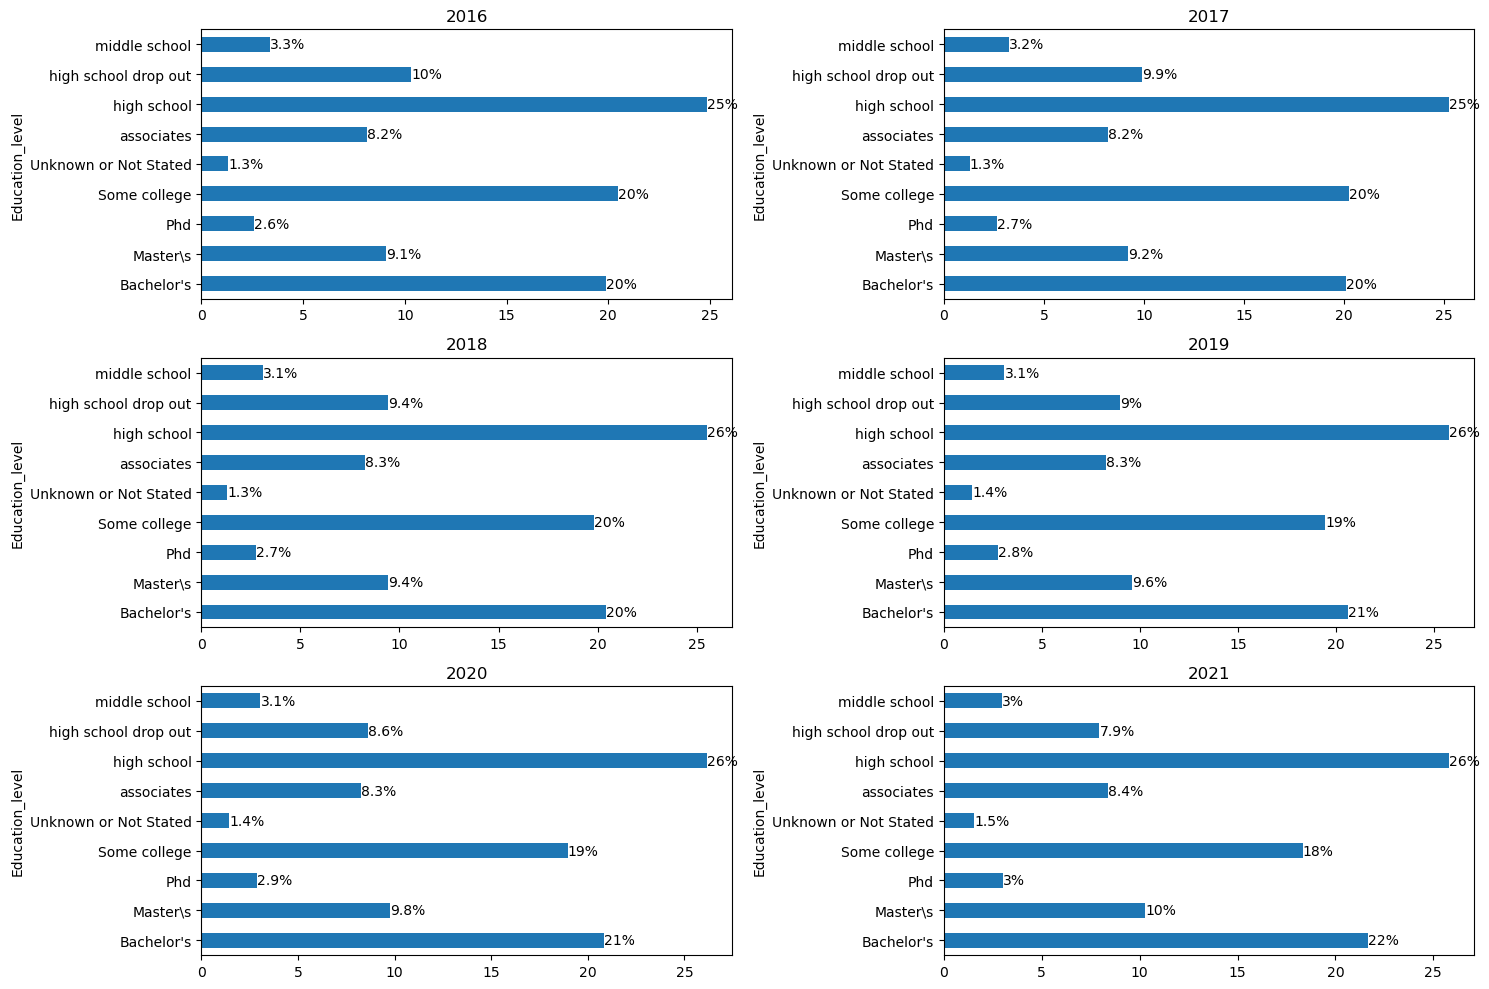

In [329]:
df_groupby_year_education = df.groupby(["Year", "Education_level"])["Num_of_births"].sum()
plt.figure(figsize=(15,10));
index = 1;
for year in df.Year.unique():
    axes=plt.subplot(3, 2, index);
    total = df_groupby_year_education[year].sum();
    t_data = df_groupby_year_education[year].apply(lambda x: (x/total)*100)
    t_data.plot(kind="barh", ax=axes, title=year);
    for c in axes.containers:
        axes.bar_label(c, label_type='edge', fmt="%0.2g%%")
    index += 1;
plt.tight_layout();
plt.show();

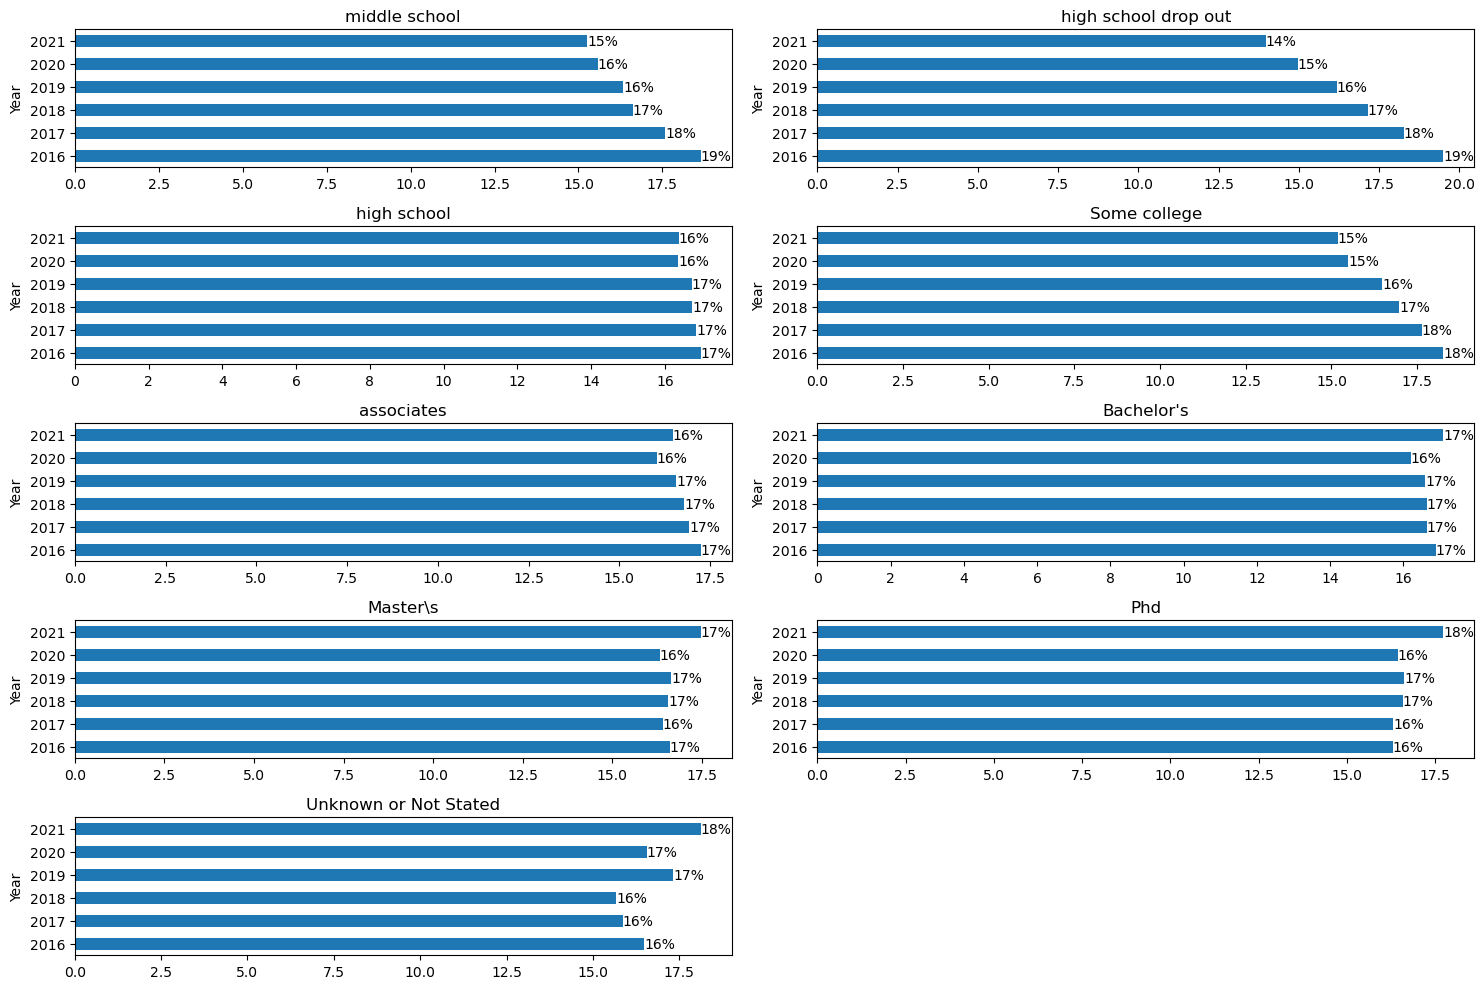

In [331]:
df_groupby_education_year = df.groupby(["Education_level", "Year"])["Num_of_births"].sum()
plt.figure(figsize=(15,10));
index = 1;
for education in df["Education_level"].unique():
    axes=plt.subplot(5, 2, index);
    total = df_groupby_education_year[education].sum();
    t_data = df_groupby_education_year[education].apply(lambda x: (x/total)*100)
    t_data.plot(kind="barh", ax=axes, title=education);
    for c in axes.containers:
        axes.bar_label(c, label_type='edge', fmt="%0.2g%%")
    index += 1;
plt.tight_layout();
plt.show();

### Average Year and Weight

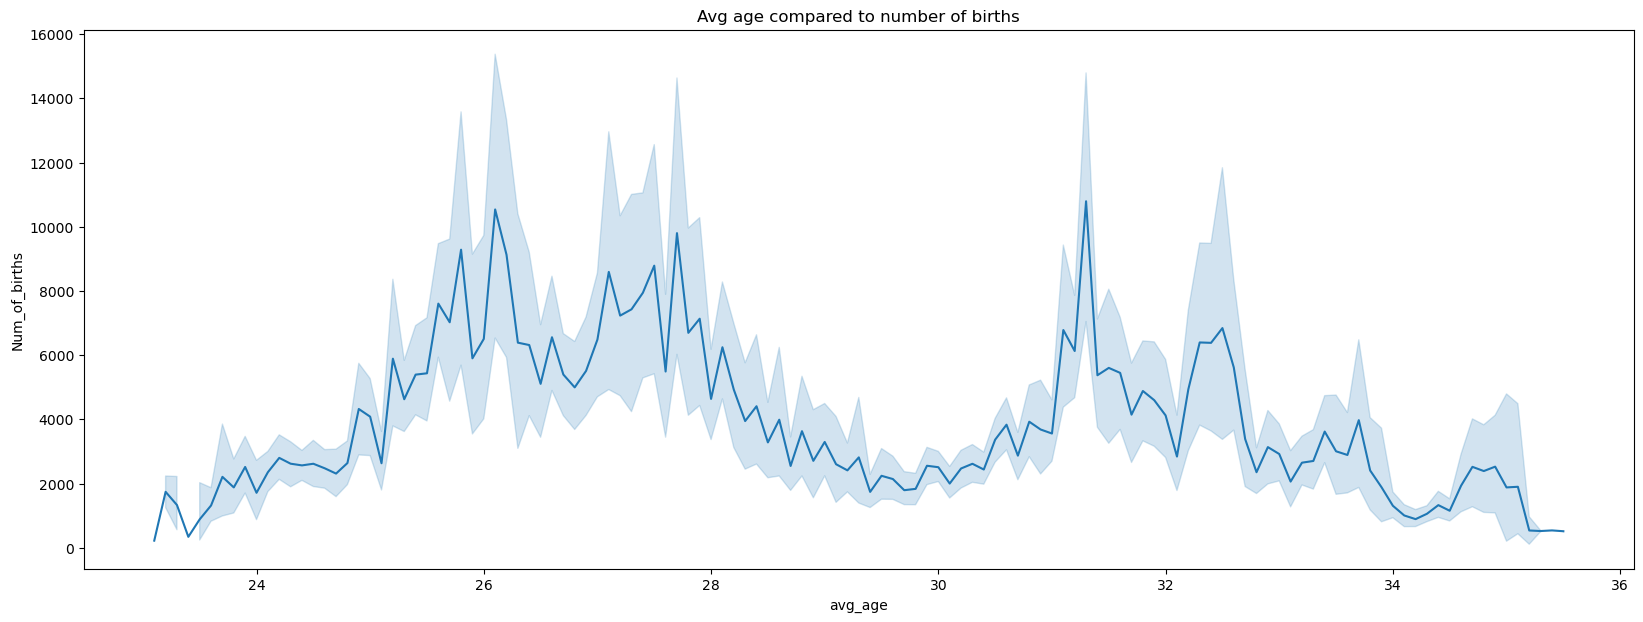

In [332]:
plt.figure(figsize=(20,7))
sns.lineplot(x='avg_age',y='Num_of_births',data = df);
plt.title('Avg age compared to number of births');

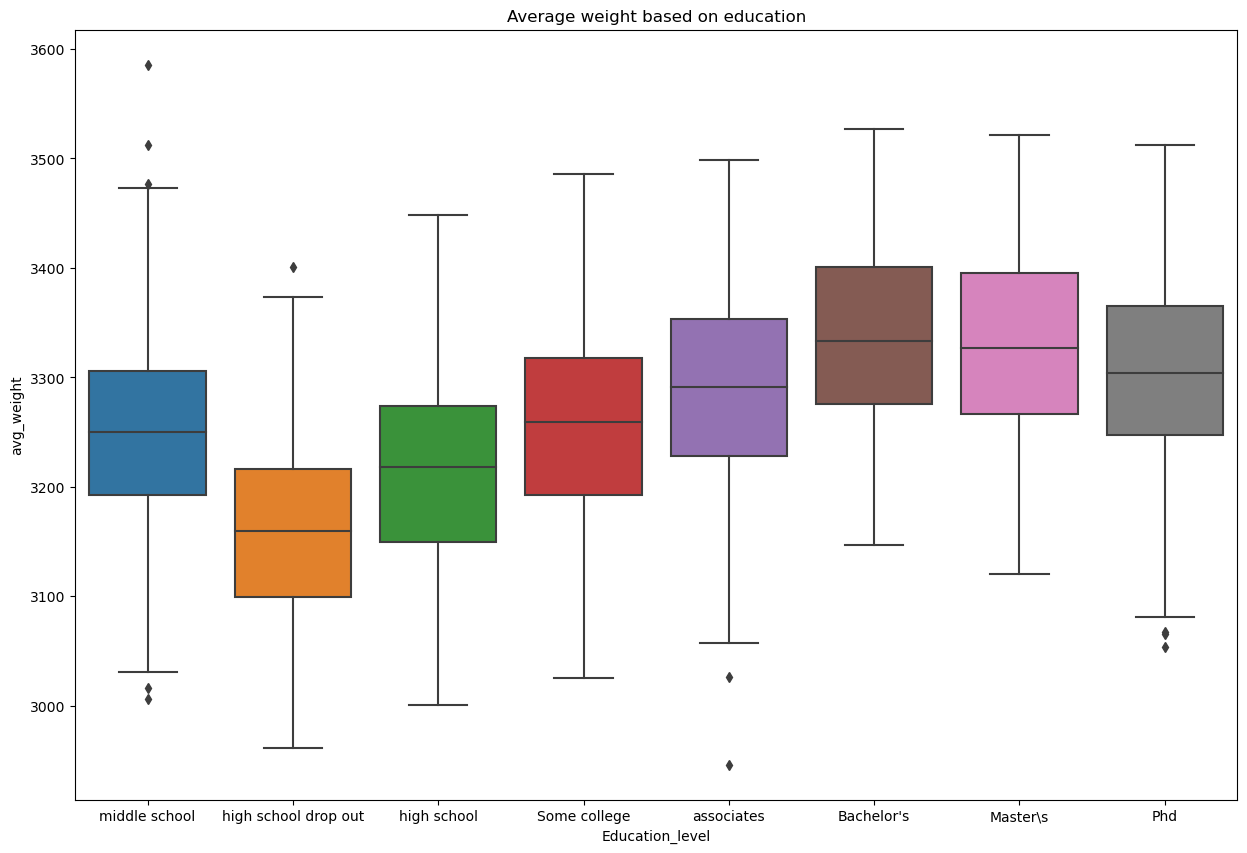

In [333]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Education_level',y='avg_weight',data = df[df['Education_level']!='Unknown or Not Stated']);
plt.title('Average weight based on education');

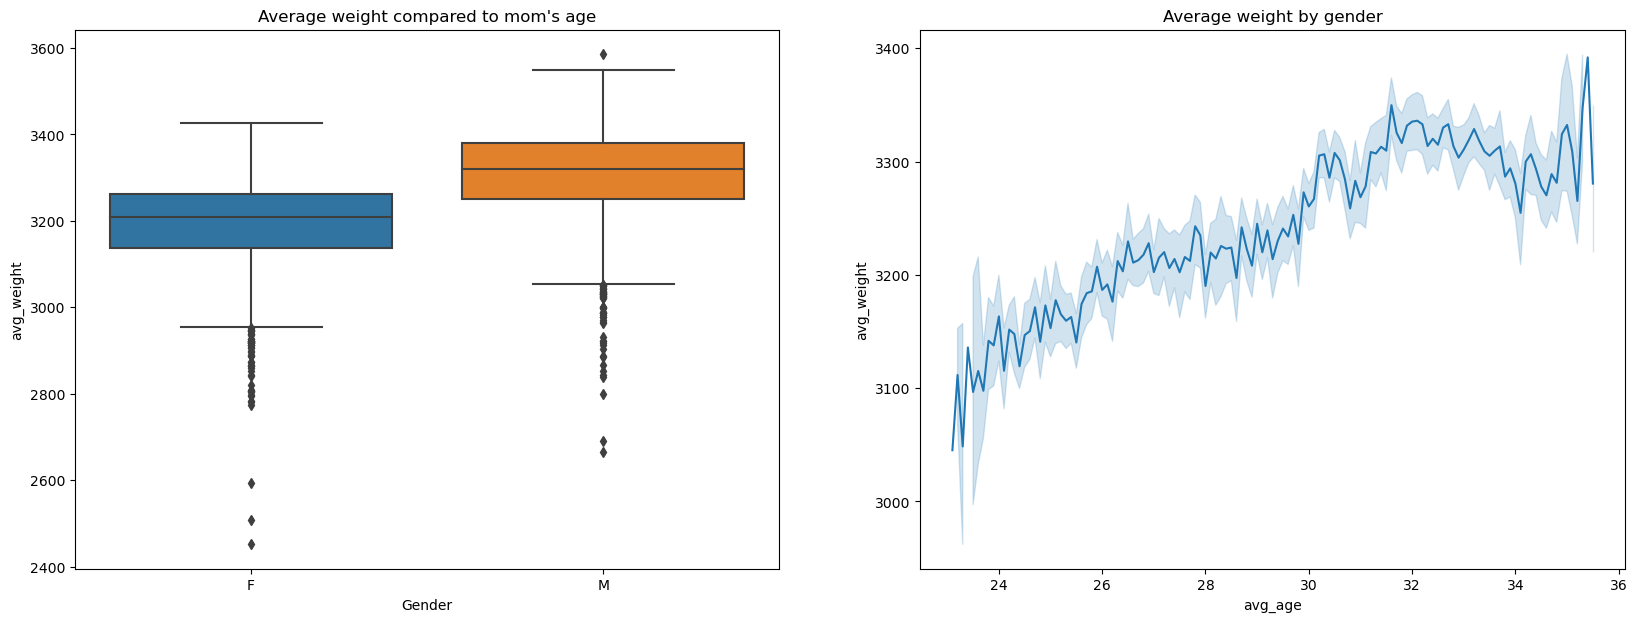

In [334]:
fig,axes = plt.subplots(nrows=1,ncols = 2,figsize=(20,7))

sns.lineplot(ax=axes[1],x='avg_age',y='avg_weight',data = df);
sns.boxplot(ax=axes[0],x='Gender',y='avg_weight',data = df);

axes[1].title.set_text('Average weight by gender')
axes[0].title.set_text('Average weight compared to mom\'s age')

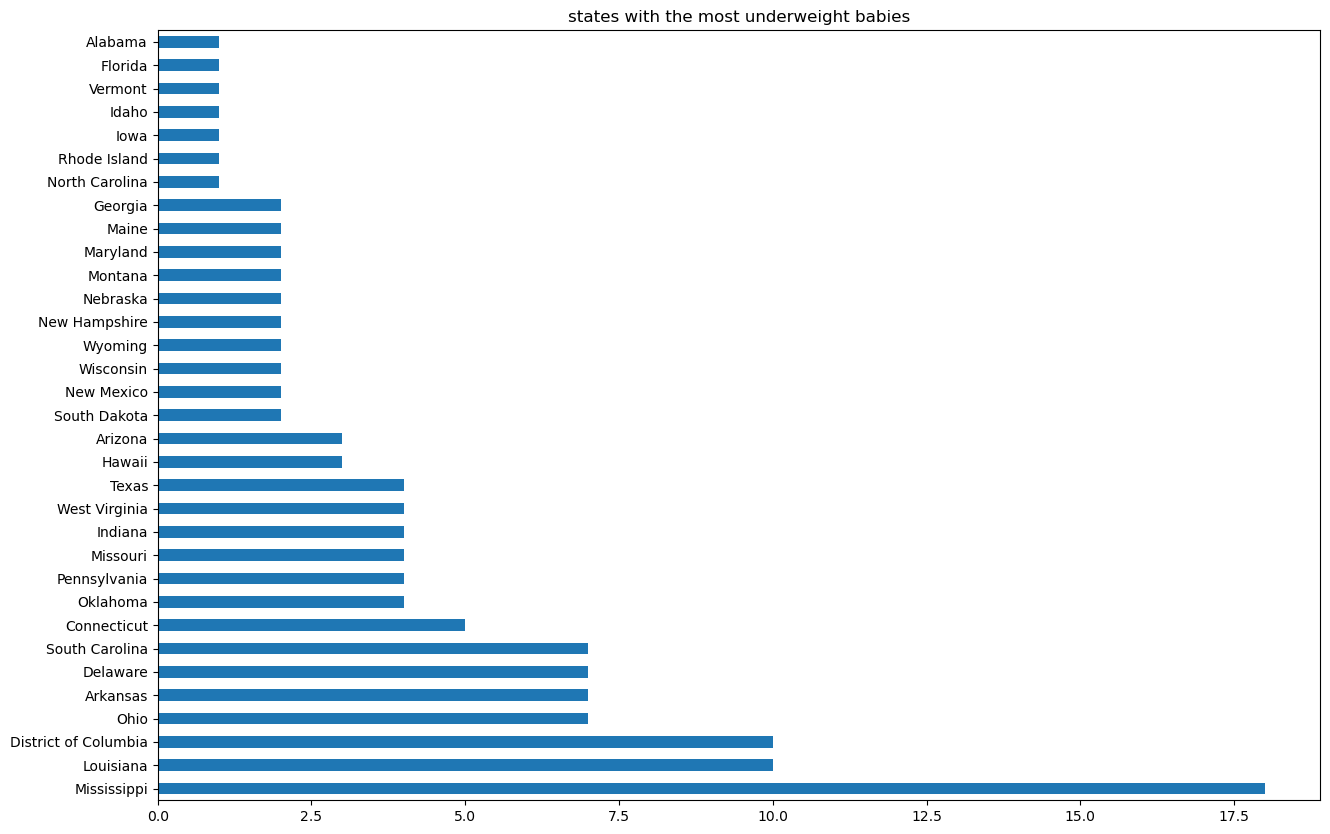

In [335]:
under_weight = df[df['avg_weight']<3000]
under_weight['State'].value_counts().plot(kind = 'barh',
                            figsize=(15,10),title = 'states with the most underweight babies');

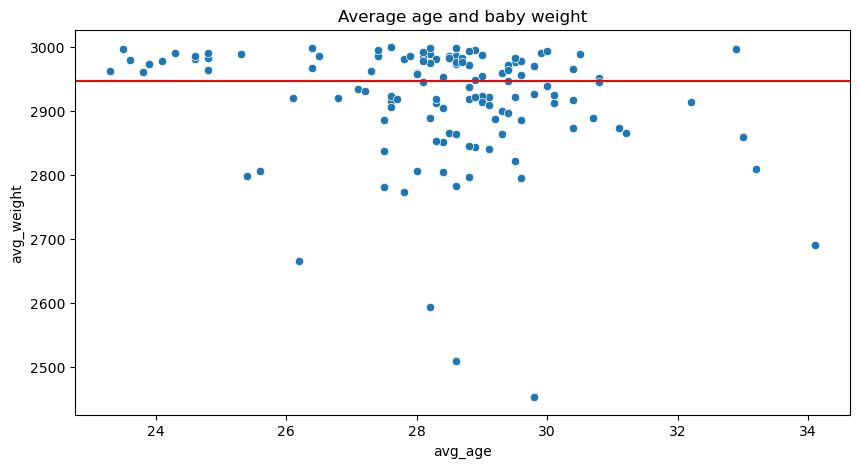

In [336]:
fig, ax = plt.subplots(figsize=(10,5));

ax.axhline(y=under_weight['avg_weight'].median(), color='red');
sns.scatterplot(x='avg_age',y='avg_weight',data = under_weight);
plt.title('Average age and baby weight');

# Summary

- The birth rate in the United States has been steadily declining since 2016. There was a small increase in 2020, but the overall trend is downward.

- The birth gender ratio in the United States is of Male over Female is 51:49.

- The states with the most births are California, Texas, New York, Florida, and Illinois.

- The majority of mothers in the United States have at least a high school diploma, and a large number have some college education. The majority of mothers with college degrees have a bachelor's degree.

- The largest number of women become mothers between the ages of 26 and 32.

- The average weight for a female baby is around 3,200 grams (7 pounds), and for a male baby it's 3,300 grams (7.3 pounds).

- The states with the most underweight babies are Mississippi, Louisiana, Arkansas, South Carolina, and Ohio.√